# Individual Assignment

Starting with the list of imports and define risk-free rate and trading days.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from scipy.optimize import minimize

plt.style.use("ggplot")

RFR = 0.0441
TRADING_DAYS = 252

## Data Retrieval

Importing daily historical data from Yahoo Finance using `yf.download`, save it as `.csv` file and import save as `.csv`. A list of ten stocks was chosen, this includes the magnificent 7, Strategy, JP Morgan and Coinbase, covering the period from January 1, 2020 to December 31, 2024.

In [33]:
tickers = ["AAPL", "MSFT", "JNJ", "PG", "JPM", "XOM", "V", "AMZN", "UNH", "COST"]
groups = []

for ticker in tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-12-31", auto_adjust=False)
    data.to_csv('ten_stocks_2020_2024.csv')
    data = pd.read_csv('ten_stocks_2020_2024.csv', header=[0,1], index_col=0, parse_dates=True)
    data.columns = data.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)

df = pd.concat(groups)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,AAPL,72.620857,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,AAPL,71.914803,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,AAPL,72.487839,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,AAPL,72.146927,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,AAPL,73.307526,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...,...
2024-12-23,COST,947.626892,949.909973,954.260010,937.000000,953.880005,1856800
2024-12-24,COST,956.515503,958.820007,959.380005,945.450012,950.739990,939000
2024-12-26,COST,953.841919,956.140015,959.409973,954.000000,956.820007,969000


### Data Cleaning

To check if the DataFrame has duplicates:

In [34]:
print(f"The number of duplicate rows: {df.duplicated().sum()}")

The number of duplicate rows: 0


Check for missing values in the DataFrame:

In [35]:
print(f"The number of missing values: {df.isnull().sum().sum()}")


The number of missing values: 0


Since there are no duplicate and missing data, the DataFrame is cleaned.

## Data Exploration

Head and tail of the wide data frame that shows the closing price for each stock.

In [36]:
df.shape
pivot_df = df.pivot_table(index=df.index, columns="Ticker", values="Close")

print("Head of dataframe of closing prices")
display(pivot_df.head())

print("Tail of dataframe of closing prices")
display(pivot_df.tail())

Head of dataframe of closing prices


Ticker,AAPL,AMZN,COST,JNJ,JPM,MSFT,PG,UNH,V,XOM
Date,,,,,,,,,,
2020-01-02,75.087502,94.900497,291.489990,145.970001,141.089996,160.619995,123.410004,292.500000,191.119995,70.900002
2020-01-03,74.357498,93.748497,291.730011,144.279999,138.339996,158.619995,122.580002,289.540009,189.600006,70.330002
2020-01-06,74.949997,95.143997,291.809998,144.100006,138.229996,159.029999,122.750000,291.549988,189.190002,70.870003
2020-01-07,74.597504,95.343002,291.350006,144.979996,135.880005,157.580002,121.989998,289.790009,188.690002,70.290001
2020-01-08,75.797501,94.598503,294.690002,144.960007,136.940002,160.089996,122.510002,295.899994,191.919998,69.230003


Tail of dataframe of closing prices


Ticker,AAPL,AMZN,COST,JNJ,JPM,MSFT,PG,UNH,V,XOM
Date,,,,,,,,,,
2024-12-23,255.270004,225.059998,949.909973,145.270004,238.389999,435.250000,168.110001,506.339996,317.220001,106.300003
2024-12-24,258.200012,229.050003,958.820007,145.850006,242.309998,439.329987,168.940002,506.100006,320.649994,106.400002
2024-12-26,259.019989,227.050003,956.140015,145.580002,243.139999,438.109985,170.160004,511.149994,320.910004,106.489998
2024-12-27,255.589996,223.750000,939.700012,145.050003,241.169998,430.529999,169.529999,509.989990,318.660004,106.480003
2024-12-30,252.199997,221.300003,922.210022,143.339996,239.320007,424.829987,167.089996,507.799988,315.309998,105.760002


A single plot showing the closing price of all ten stocks over the five year period are shown.

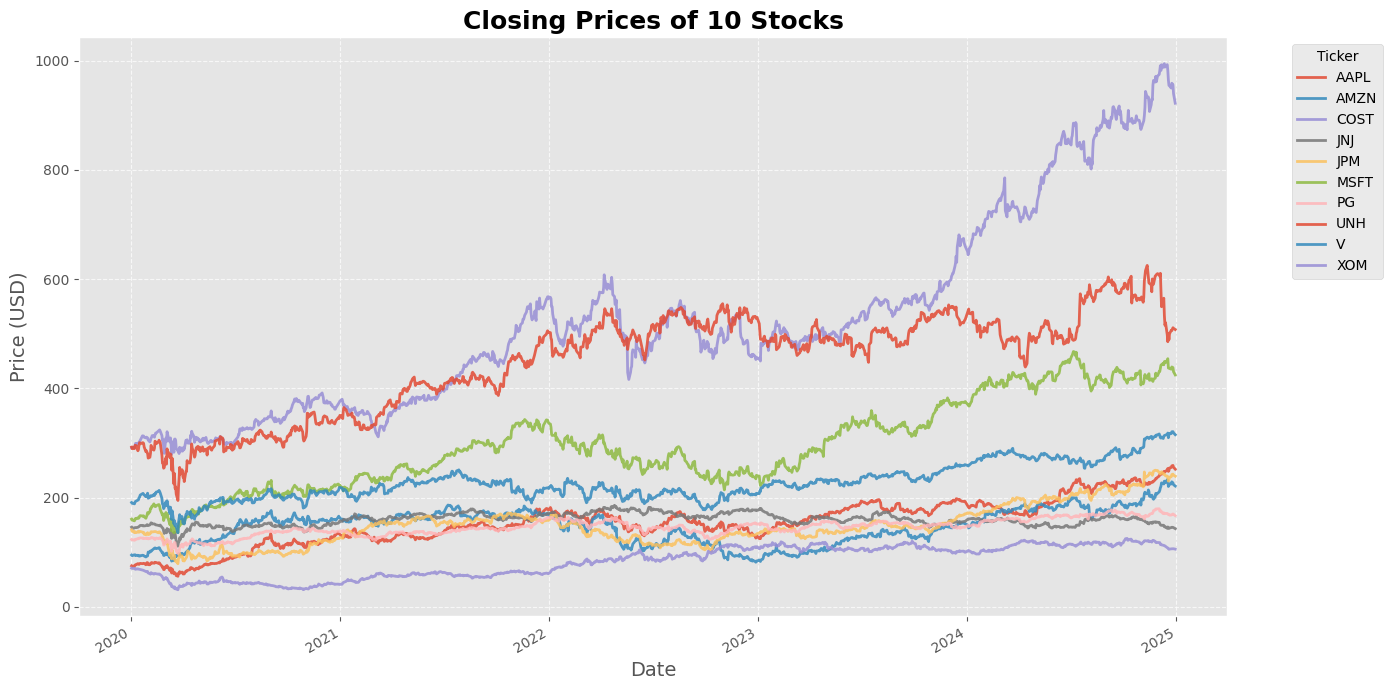

In [37]:
plt.figure(figsize=(14, 7))
pivot_df.plot(ax=plt.gca(), linewidth=2, alpha=0.85)
plt.title('Closing Prices of 10 Stocks', fontsize=18, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Backtesting

The Bollinger Bands Mean Reversion Strategy is implemented for each stock. The Bollinger Band Mean Reversion Strategy includes the following:
- Calculate Bollinger Bands on closing prices, comprising of the middle band (20-day simple moving average), and the upper and lower bands (at 2 standard deviations from the middle band).
- Entry Signal:
    - Buy signal when asset's closing price falls below the Bollinger Band
    - Sell signal when asset's closing price exceeds the upper Bollinger Band
- Exit Signal:
    - Exit buy position when price rises back to middle band
    - Exit sell position when price decline back to the middle band

In [38]:
def bollinger_band(dfi):
    # Bollinger Bands calculation
    dfi["SMA"] = dfi["Close"].rolling(window=20).mean()
    dfi["Dev"] = dfi["Close"].rolling(window=20).std()
    dfi["HighBand"] = dfi["SMA"] + 2 * dfi["Dev"]
    dfi["MiddleBand"] = dfi["SMA"]
    dfi["LowBand"] = dfi["SMA"]  - 2 * dfi["Dev"]

    dfi["Signal"] = 0

    # Entry Signals
    dfi["Signal"] = np.where(dfi.LowBand > dfi.Close, 1, dfi.Signal)
    dfi["Signal"]= np.where(dfi.Close > dfi.HighBand, -1, dfi.Signal)

    # Exit Signals
    dfi["Signal"] = np.where((dfi.Signal.shift(1) == 1) & (dfi.Close >= dfi.SMA), 0, dfi.Signal)
    dfi["Signal"] = np.where((dfi.Signal.shift(1) == -1) & (dfi.Close <= dfi.SMA), 0, dfi.Signal)

    dfi["Signal"] = np.where(dfi.SMA.isna(), 0, dfi.Signal)

    dfi["Position"] = dfi.Signal.shift()

    return dfi


The simple daily return and the daily return of the Strategy are then calculated.

In [39]:
def strategy_returns(Close, signals):
    daily_ret = Close.pct_change().fillna(0)
    strat_ret = daily_ret * signals.shift(1).fillna(0)
    return daily_ret, strat_ret

results = {}

for ticker in tickers:
    ticker_df = df[df['Ticker'] == ticker].copy()
    strat = bollinger_band(ticker_df)
    daily_ret, strat_ret = strategy_returns(ticker_df['Close'], strat['Signal'])
    results[ticker] = {
        'daily_ret': daily_ret,
        'strat_ret': strat_ret,
        'cumulative_bh': (1 + daily_ret).cumprod() - 1,
        'cumulative_strat': (1 + strat_ret).cumprod() - 1
    }

The end-of-period cumulative return for the strategy vs buy and hold are displayed.

In [40]:
table_data = []

for ticker in tickers:

    bh_return = results[ticker]['cumulative_bh'][-1]
    strat_return = results[ticker]['cumulative_strat'][-1]
    
    table_data.append({
        'Ticker': ticker,
        'Buy+Hold Return (%)': bh_return * 100,
        'Strategy Return (%)': strat_return * 100
    })

# Convert to DataFrame
df_results = pd.DataFrame(table_data)

df_results['Buy+Hold Return (%)'] = df_results['Buy+Hold Return (%)'].round(2)
df_results['Strategy Return (%)'] = df_results['Strategy Return (%)'].round(2)

print(df_results)

  Ticker  Buy+Hold Return (%)  Strategy Return (%)
0   AAPL               235.87                17.96
1   MSFT               164.49                72.75
2    JNJ                -1.80                 0.15
3     PG                35.39                 3.95
4    JPM                69.62                19.04
5    XOM                49.17                16.78
6      V                64.98                32.86
7   AMZN               133.19               -12.10
8    UNH                73.61                39.80
9   COST               216.38                12.26


/tmp/ipykernel_7713/3978197041.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bh_return = results[ticker]['cumulative_bh'][-1]
/tmp/ipykernel_7713/3978197041.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  strat_return = results[ticker]['cumulative_strat'][-1]


## Portfolio Management

The correlation matrix of the simply daily return of the portfolio is visualised.

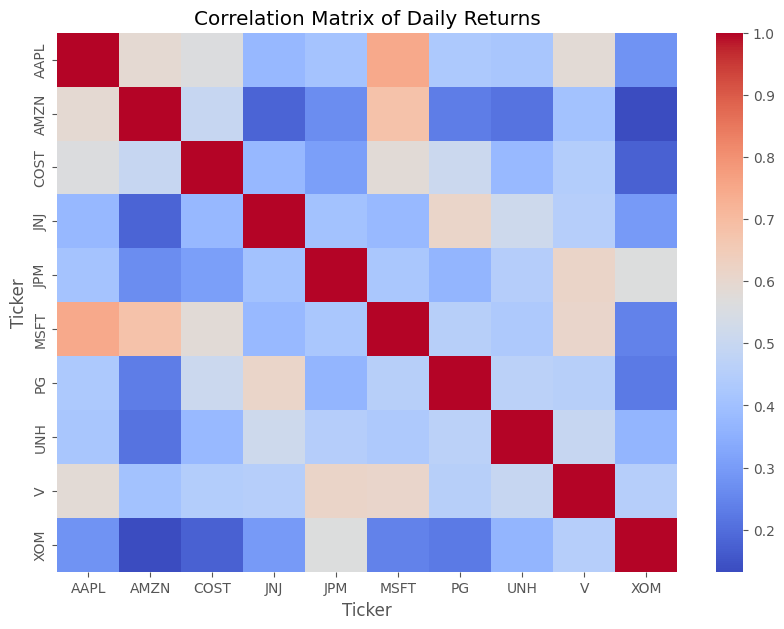

In [41]:
correlation_matrix = pivot_df.pct_change().corr()

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix of Daily Returns')
plt.show()

A portfolio of the ten stockes with equal initial weights are created. The portfolio daily returns are displayed below.

In [42]:
pivot_df.index = pd.to_datetime(pivot_df.index, dayfirst=True)
pivot_df.sort_index(inplace=True)

pivot_df.iloc[:, 0:10]
df = pivot_df.loc[:, ["AAPL", "MSFT", "JNJ", "PG", "JPM", "XOM", "V", "AMZN", "UNH", "COST"]]

weights = np.ones(10) / 10

returns = df.pct_change()
returns.dropna(inplace=True)

p_returns = returns.dot(weights)
p_returns.name = "Portfolio Daily Returns"
p_returns


Date
2020-01-03   -0.009740
2020-01-06    0.003751
2020-01-07   -0.004725
2020-01-08    0.007072
2020-01-09    0.008105
                ...   
2024-12-23    0.002033
2024-12-24    0.008461
2024-12-26    0.000930
2024-12-27   -0.008709
2024-12-30   -0.011149
Name: Portfolio Daily Returns, Length: 1256, dtype: float64

Using the data of the portfolio daily returns, the cumulative return of the ten stock portfolio are shown in the table below and the end-of-period cumulative return are displayed.

In [43]:
cumulative_return = (1 + p_returns).cumprod() - 1
final_cumulative_return = cumulative_return.iloc[-1]
print(f"End-of-period Cumulative portfolio return: {final_cumulative_return: .4%}")
cumulative_return

End-of-period Cumulative portfolio return:  113.5626%


Date
2020-01-03   -0.009740
2020-01-06   -0.006025
2020-01-07   -0.010722
2020-01-08   -0.003726
2020-01-09    0.004349
                ...   
2024-12-23    1.158391
2024-12-24    1.176653
2024-12-26    1.178678
2024-12-27    1.159704
2024-12-30    1.135626
Name: Portfolio Daily Returns, Length: 1256, dtype: float64

The daily standard deviation of the portfolio returns are calculated and displayed as shown below.

In [44]:
p_std = p_returns.std()
print(f"Annualized Volatility: {p_std: .2}")

Annualized Volatility:  0.013


## Portfolio Optimisation

Portfolio optimisation by maximising the Sharpe Ratio is first implemented. The optimal weights of each stock are shown as a percentage, and corresponds to each stock in the following order Apple, Microsoft, Amazon, Meta, Tesla, Nvidia, Alphabet, Strategy, JP Morgan and Coinbase.

In [45]:
def negative_sharpe(weights):
    p_returns = np.dot(returns, weights)
    annualised_returns = p_returns.mean() * TRADING_DAYS
    annualised_volatility = p_returns.std() * np.sqrt(TRADING_DAYS)
    sharpe = (annualised_returns - RFR) / annualised_volatility

    return -sharpe

In [46]:
cons = {"type": "eq", "fun": lambda x: sum(x) - 1}

bounds = tuple((0, 1) for x in range(10))

init_weights = np.ones(10) / 10

optimal = minimize(negative_sharpe, init_weights, bounds=bounds, constraints=cons)
opt_weights = optimal.x
opt_weights * 100

array([3.04886637e+01, 0.00000000e+00, 9.62771529e-15, 4.31512465e-15,
       0.00000000e+00, 3.38885798e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.61224783e+01])

The cumulative daily return for the maximised Sharpe Ratio are displayed.

In [47]:
port_daily_returns_opt = returns.dot(opt_weights)
port_cumulative_daily_return_opt = (1 + port_daily_returns_opt).cumprod() -1
port_cumulative_daily_return_opt.name = "Returns for maximising the Sharpe Ratio Portfolio"
port_cumulative_daily_return_opt

Date
2020-01-03   -0.002692
2020-01-06    0.000171
2020-01-07   -0.002583
2020-01-08    0.009360
2020-01-09    0.026871
                ...   
2024-12-23    2.376130
2024-12-24    2.408992
2024-12-26    2.406090
2024-12-27    2.353603
2024-12-30    2.298000
Name: Returns for maximising the Sharpe Ratio Portfolio, Length: 1256, dtype: float64

For the AI-generated portfolio optimisation, the Maximise return for Target Risk Strategy is implemented. This strategy is chosen due to its ability to achieve the highest possible expected return while ensuring that the portfolio's overall risk does not exceed a predefined threshold. The maximise return for Target Risk Strategy includes the following:
- Inputs: expected returns, covariance matrix of returns and the maximum allowed volatility
- Define the objective function which calculated the negative of the expected return of the portfolio
- Define the volatility constraint to ensure the portfolio's volatility stays below the target
- Define weight sum constraint to ensure the weights sum to 1
- Set Bounds and Initial Guess
- Run the optimisation and output the result

The optimal portfolio found by the Maximise return for Target Risk Strategy, the maximum expected return and the portfolio volatility are displayed below.

In [48]:
## Maximise return for Target Risk

target_volatility = 0.20
num_assets = len(pivot_df.columns)

# Calculate expected returns and covariance matrix
expected_returns = returns.mean() * TRADING_DAYS
cov_matrix = returns.cov() * TRADING_DAYS

# Objective Function: Negative Expected Return
def negative_portfolio_return(weights, expected_returns):
	return -np.dot(weights, expected_returns)

# Constraint: Portfolio volatility must be ≤ target
def volatility_constraint(weights, cov_matrix, target_volatility):
	portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
	return target_volatility - portfolio_volatility  # Must be ≥ 0

# Constraint: Weights must sum to 1
def weight_sum_constraint(weights):
	return np.sum(weights) - 1

# Bounds and Initial Guess
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = np.array([1.0 / num_assets] * num_assets)

# Constraints Dictionary
constraints = [
	{'type': 'eq', 'fun': weight_sum_constraint},
	{'type': 'ineq', 'fun': lambda w: volatility_constraint(w, cov_matrix, target_volatility)}
]

# Run Optimisation
result = minimize(
	negative_portfolio_return,
	initial_weights,
	args=(expected_returns,),
	method='SLSQP',
	bounds=bounds,
	constraints=constraints
)

# Output Results
if result.success:
	optimal_weights = result.x
	max_return = -result.fun
	final_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
	print("Optimal Portfolio Weights:", optimal_weights)
	print("Maximum Expected Return (under target risk):", max_return)
	print("Portfolio Volatility:", final_volatility)
else:
	print("Optimization failed:", result.message)


Optimal Portfolio Weights: [0.11902452 0.         0.00332989 0.11729693 0.01598002 0.12916169
 0.         0.03856033 0.05596722 0.5206794 ]
Maximum Expected Return (under target risk): 0.2185819360094224
Portfolio Volatility: 0.2000000347607392


The cumulative daily return of the Maximise Return for Target Risk Strategy are displayed.

In [49]:
port_daily_returns_opt_maxret = returns.dot(optimal_weights)
port_cumulative_daily_return_opt_maxret = (1 + port_daily_returns_opt_maxret).cumprod() -1
port_cumulative_daily_return_opt_maxret.name = "Maximise Return for Target Risk Portfolio Returns"
port_cumulative_daily_return_opt_maxret


Date
2020-01-03   -0.003940
2020-01-06   -0.000762
2020-01-07   -0.004431
2020-01-08    0.002975
2020-01-09    0.016107
                ...   
2024-12-23    1.739937
2024-12-24    1.761539
2024-12-26    1.761951
2024-12-27    1.729348
2024-12-30    1.689348
Name: Maximise Return for Target Risk Portfolio Returns, Length: 1256, dtype: float64

A visual plot of three strategies:
- Cumulative Sharpe Ratio optimised portfolio returns
- Cumulative Maximum Return for Target Risk Strategy portfolio returns
- Cumulative initial (equal-weighting) portfolio returns

are shown below.

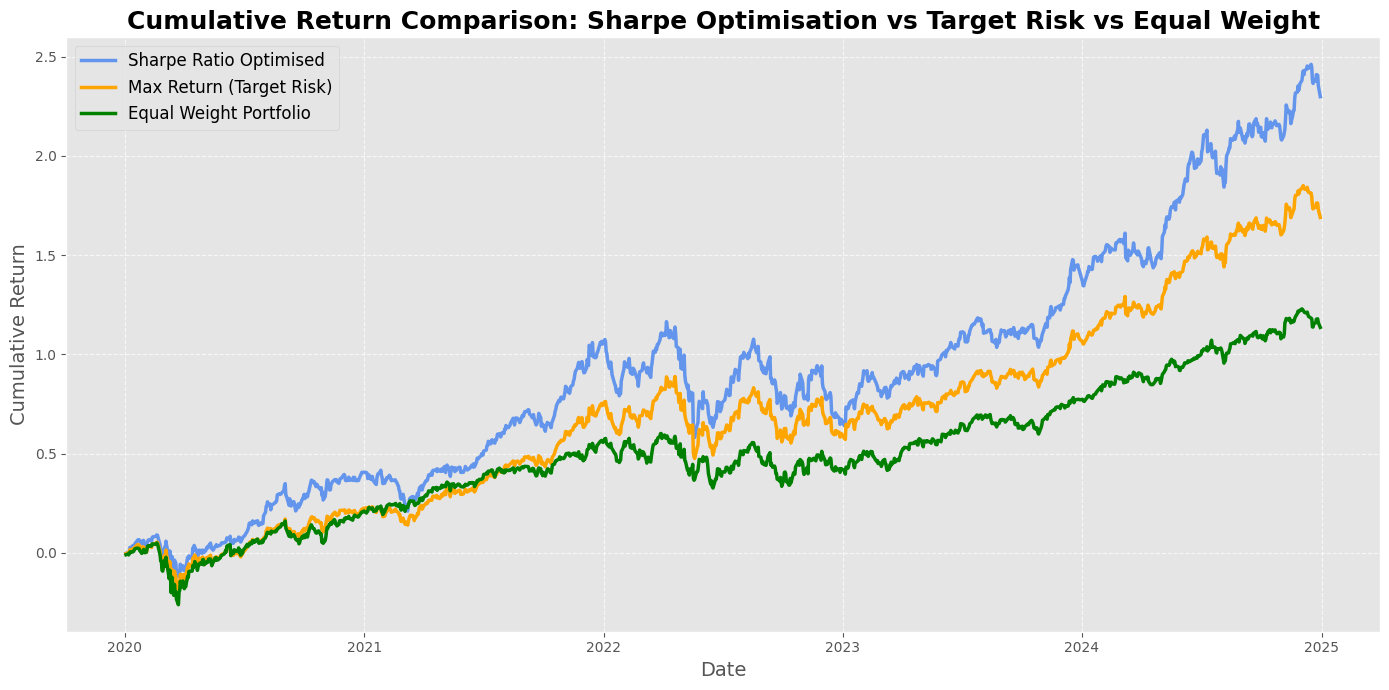

In [50]:
plt.figure(figsize=(14, 7))
plt.plot(port_cumulative_daily_return_opt, label="Sharpe Ratio Optimised", linewidth=2.5, color="cornflowerblue")
plt.plot(port_cumulative_daily_return_opt_maxret, label="Max Return (Target Risk)", linewidth=2.5, color="orange")
plt.plot(cumulative_return, label="Equal Weight Portfolio", linewidth=2.5, color="green")

plt.title("Cumulative Return Comparison: Sharpe Optimisation vs Target Risk vs Equal Weight", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Return", fontsize=14)
plt.legend(fontsize=12, frameon=True, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()